# Forecast and Predictions Project: Predicting Customer Churn

<b>Project Description:</b>    


The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness digitized a number of customer profiles. Your task is to analyze them and come up with a customer retention strategy.

<b>Goals:<b/>
* Learn to predict the probability of churn (for the upcoming month) for each customer

* Draw up typical user portraits: select the most outstanding groups and describe their main features

* Analyze the factors that impact churn most

* Draw basic conclusions and develop recommendations on how to improve customer service:

  * Identify target groups
  * Suggest measures to cut churn
  * Describe any other patterns you see with respect to interaction with customers

<b>User data for the preceding month:</b>

`'gender'`

`'Near_Location'` — whether the user lives or works in the neighborhood where the gym is located
    
`'Partner'` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

`Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

`'Phone'` — whether the user provided their phone number

`'Age'`

`'Lifetime'` — the time (in months) since the customer first came to the gym

<b>Data from the log of visits and purchases and data on current membership status:</b>

`'Contract_period'` — 1 month, 3 months, 6 months, or 1 year

`'Month_to_end_contract'` — the months remaining until the contract expires

`'Group_visits'` — whether the user takes part in group sessions

`'Avg_class_frequency_total'` — average frequency of visits per week over the customer's lifetime

`'Avg_class_frequency_current_month'` — average frequency of visits per week over the preceding month

`'Avg_additional_charges_total'` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

# Table of Contents 

1. [Download the data and read the general information](#start)
    
    
2. [Prepare the data for analysis](#preprocessing)
    * [Renaming columns](#duplicates)
    * [Check for missing values and datatypes](#null)
    * [Processing duplicate data](#duplicates)
    
    
3. [Carry out exploratory data analysis (EDA)](#preprocessing)
    * [Mean values for churners and non-churners](#null)
    * [Histogram distributions for churners and non-churners](#duplicates)
    * [Correlation Matrix heatmap for churn](#duplicates)

    

4.  [Build a model to predict user churn](#duplicates)
    * [Logistic Regression model for user churn](#duplicates)
    * [Random Forest Classifier for user churn](#duplicates)


5.  [Create user clusters](#duplicates)
    * [Hierarchical clustering for Gym Churn/ Dendrogram](#duplicates)
    * [K Means model](#duplicates)
    * [Churn rate percentage for clusters](#duplicates)
    * [Plots for each cluster by churn rate](#duplicates)


6.  [Come up with conclusions and basic recommendations on working with customers](#duplicates)
    * [Conclusions](#duplicates)
    * [Recommendations](#duplicates)

# 1. Download the data and read the general information

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#load the data
try:
    gym_churn= pd.read_csv('/datasets/gym_churn_us.csv')
    
except:
    gym_churn= pd.read_csv('gym_churn_us.csv')

In [3]:
#general info
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [5]:
#preview of the first 3 rows
gym_churn.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Initially we can see that the names of the columns are inconsistent. We can change them to 'snake_case' to be more uniform. We also see that the values in a lot of the columns seem to be binary where the values are in 1's and 0's. That might make it easier for us to analyse the data.

# 2. Prepare the data for analysis

In [6]:
#check the data for missing values
gym_churn.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
#check the data for duplicates
gym_churn.duplicated().sum()

0

There doesn't seem to be any missing values or duplicate rows. Now we can move on to changing the column names. 

In [8]:
#changing column names to lowercase
gym_churn.columns= gym_churn.columns.str.lower()

In [9]:
gym_churn.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Now all the column names are in lowercase.

In [10]:
#changing the datatype from float to int
gym_churn['month_to_end_contract']= gym_churn['month_to_end_contract'].astype('int')

In [11]:
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


Now our dataset looks cleaner

# 3. Carry out exploratory data analysis (EDA)

Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [12]:
#grouping the mean values of people who churned and people who didn't churn
gym_churn.groupby('churn').mean().transpose()

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Results of the above data:

    - It's pretty even among churners between Men and Women
    
    - People who live closer to the gym are less likely to churn
    
    - People who go to the gym with a partner are less likely to churn
    
    - People who go to the gym because of a promo are less likely to churn
    
    - There is no difference whether a person provides their phone number or not
    
    - People who have a longer contract period are less likely to churn
    
    - People who attend group workouts are less likely to churn
    
    - People who are older (30 year old avg) are less likely to churn
    
    - People who pay a little more are less likely to churn
    
    - People with longer month to end contract are less likely to churn
    
    - People who have been members for longer are less likely to churn
    
    - People who attend more classes are less likley to churn

Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [13]:
#separating churners and non-churners into two groups
cust_churned= gym_churn.query('churn==1')
cust_stayed= gym_churn.query('churn==0')

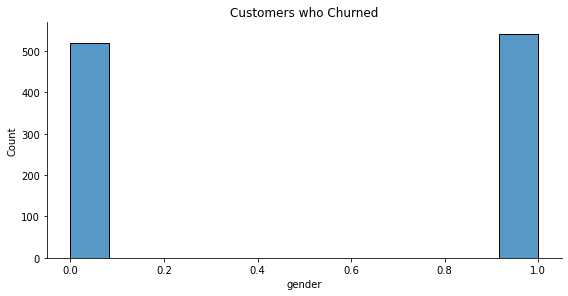

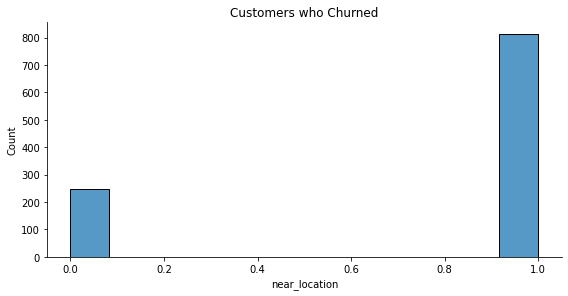

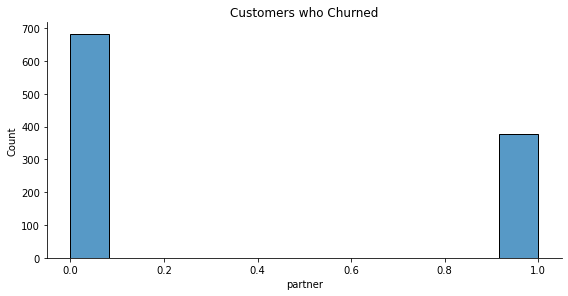

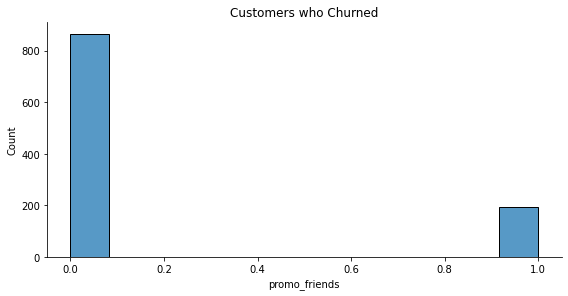

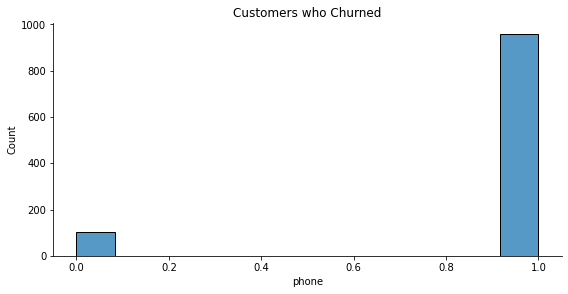

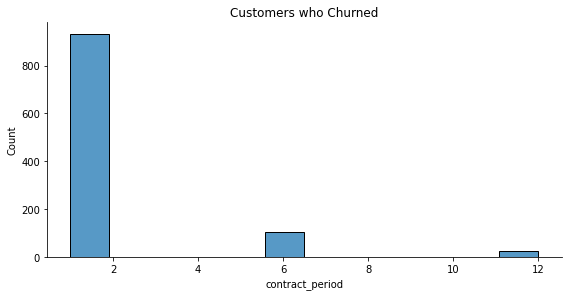

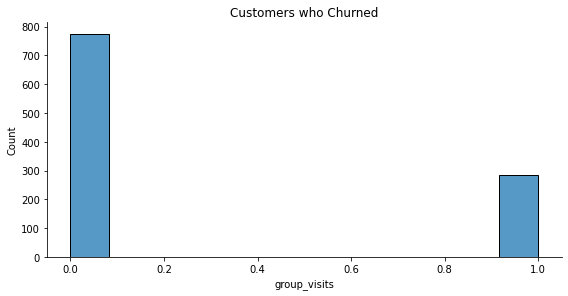

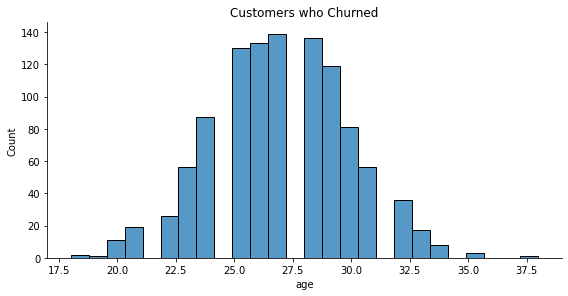

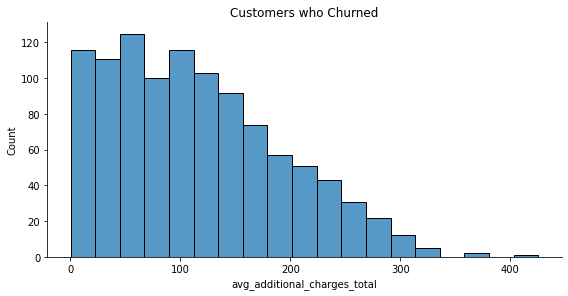

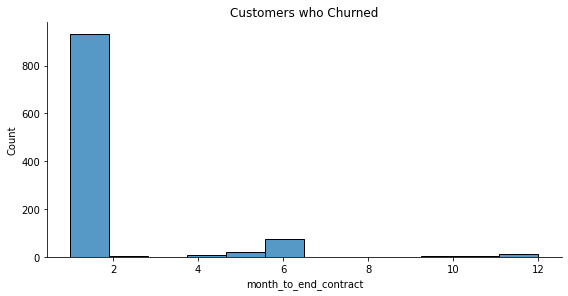

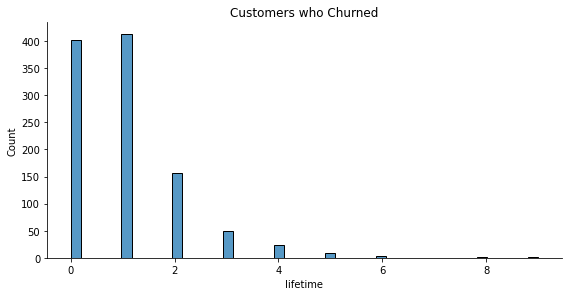

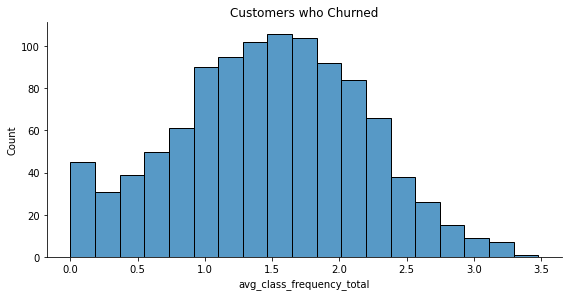

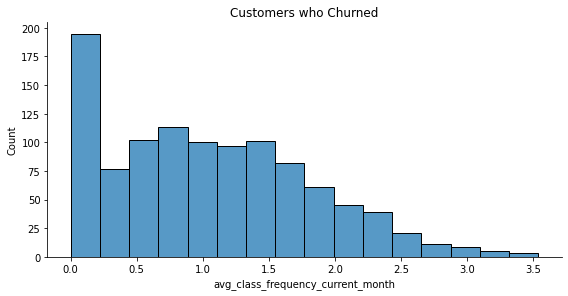

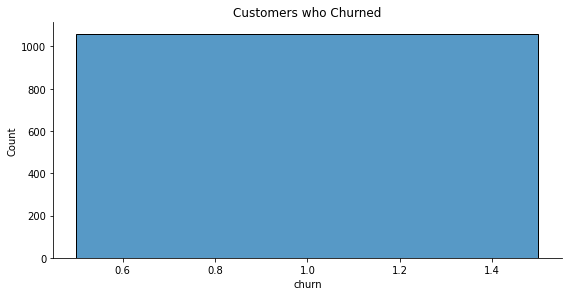

In [14]:
#creating a for loop to graph each column for customers who Churned
for i in cust_churned.columns:
    sns.displot(data= cust_churned, x= i, height= 4, aspect= 2)
    plt.title('Customers who Churned')

In the above graphs we can see that customers who churned:
* Were equal among men and women
* mostly lived nearby
* didn't bring a partner
* didn't use the 'bring a friend' promo
* provided their phone number
* had shorter contract periods
* didn't attend group sessions
* were mostly between 25 and 28 years old
* paid lower fees/ charges
* shorter month-to-end contracts
* weren't members for a long time
* only attended the gym once or twice a month

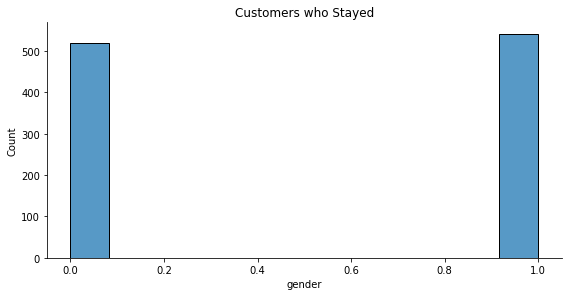

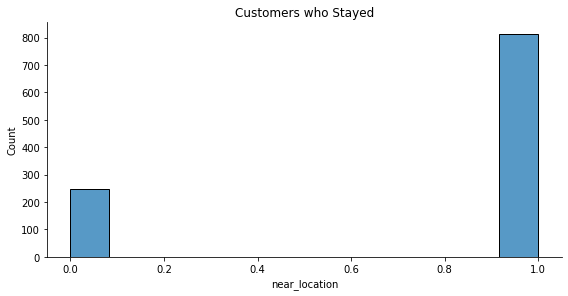

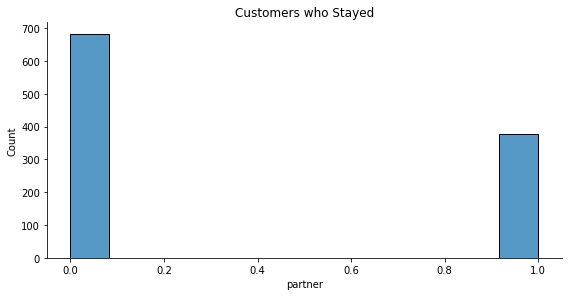

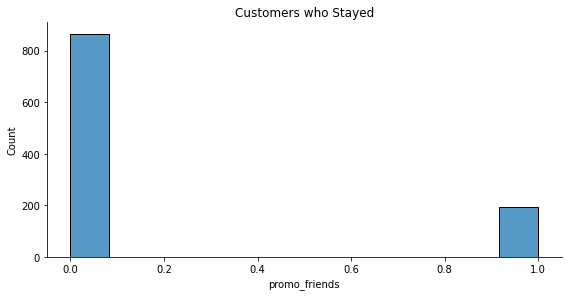

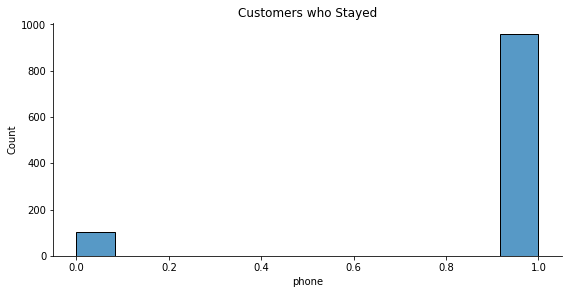

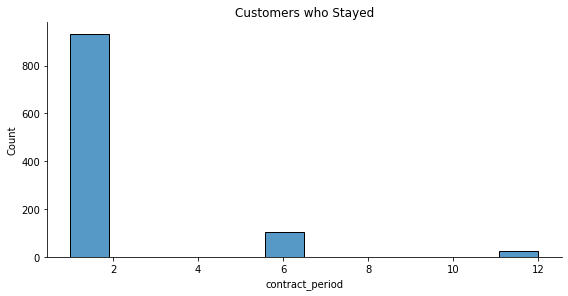

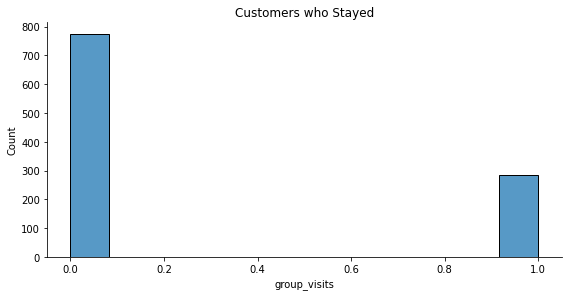

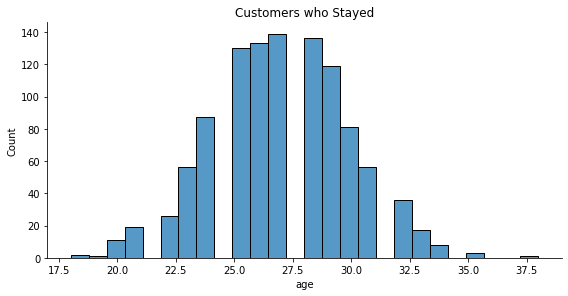

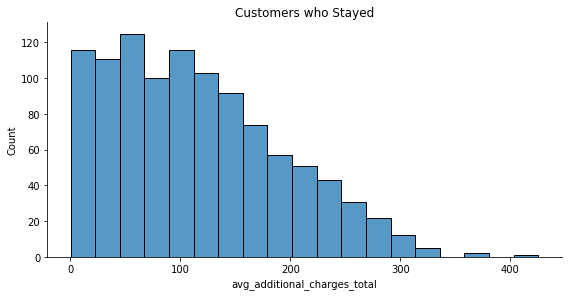

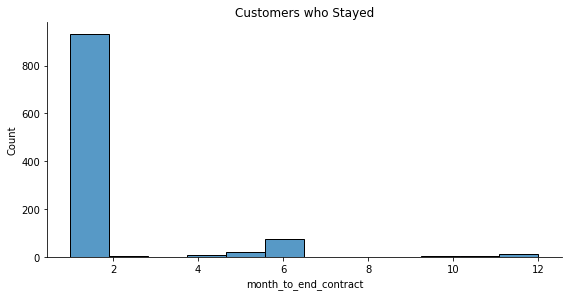

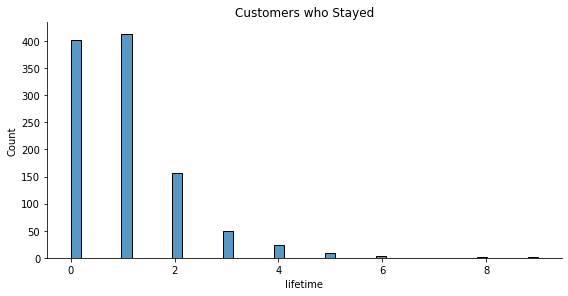

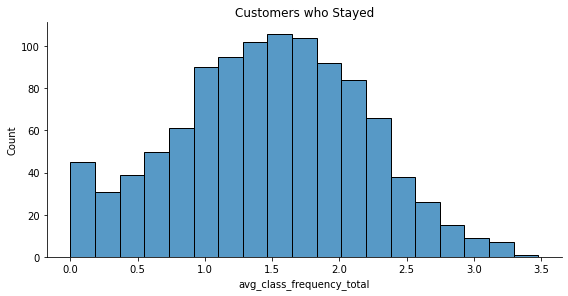

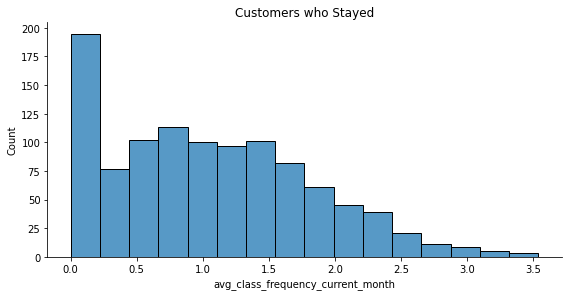

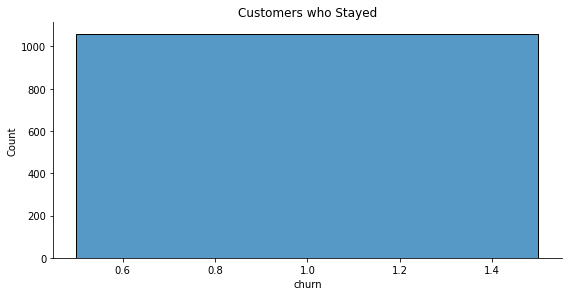

In [15]:
#creating a for loop to graph each column for customers who are non-churners
for i in cust_stayed.columns:
    sns.displot(data= cust_churned, x= i, height= 4, aspect= 2)
    plt.title('Customers who Stayed')

In the above graphs we can see that customers who stayed:
* Were equal among men and women
* mostly lived nearby
* tend to bring a partner more than churners
* didn't use the 'bring a friend' promo
* provided their phone number
* had slightly longer contract periods
* didn't attend group sessions
* were mostly between 25 and 28 years old
* paid slightly more fees/ charges
* had longer month-to-end contracts
* were members for longer periods
* attended a little more often than churners

The differences between members who churned or stayed seem to not be too noticeable, however it is clear that customers who stayed would bring partners more often, had slightly longer contract periods, paid more fees, and attended more often than churners.

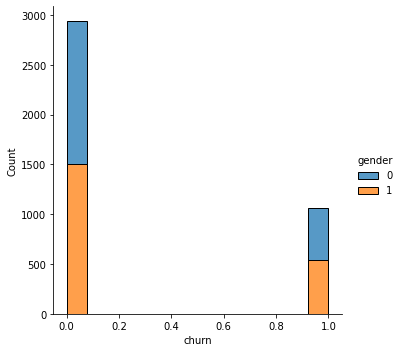

In [16]:
sns.displot(data=gym_churn,x="churn",hue="gender",multiple="stack")

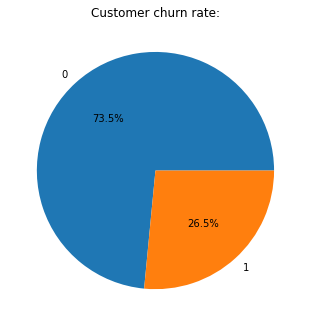

In [17]:
# Plotting target feature distribution
sizes = gym_churn['churn'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

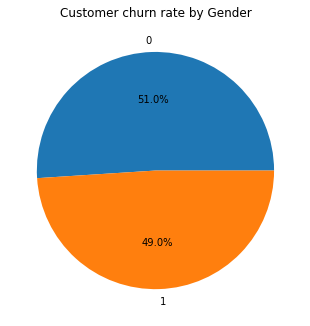

In [18]:
# Plotting target feature distribution
sizes = gym_churn['gender'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate by Gender")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

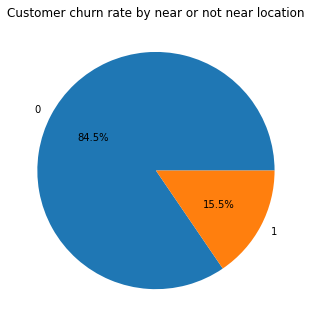

In [19]:
# Plotting target feature distribution
sizes = gym_churn['near_location'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate by near or not near location")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

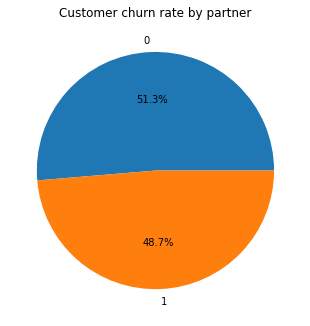

In [20]:
# Plotting target feature distribution
sizes = gym_churn['partner'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate by partner")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

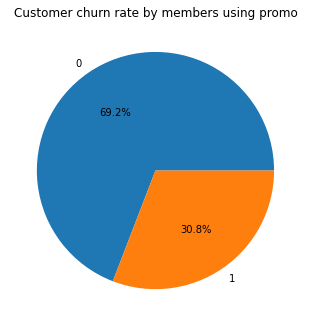

In [21]:
# Plotting target feature distribution
sizes = gym_churn['promo_friends'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate by members using promo")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

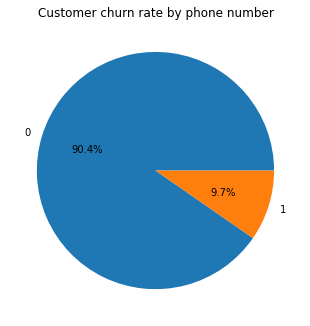

In [22]:
# Plotting target feature distribution
sizes = gym_churn['phone'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate by phone number")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

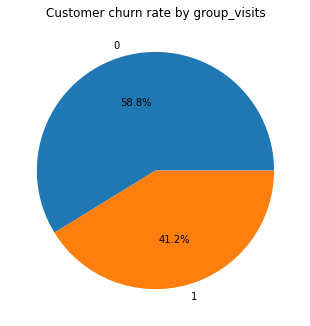

In [23]:
# Plotting target feature distribution
sizes = gym_churn['group_visits'].value_counts(sort = True)
labels = np.unique(gym_churn.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Customer churn rate by group_visits")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

In [24]:
#cust_churned.groupby(['gender']).sum().plot(kind='pie', y='churn')
#plt.title('Customers who Stayed')
#plt.show()

In [25]:
#plt.title('Customers who Churned')
#sns.distplot(cust_churned[['gender']], rug=True)
#plt.xlabel('Gender')
#plt.show()

In [26]:
#fig, axes = plt.subplots(figsize=(8,5))
#data = gym_churn["churn"].value_counts(normalize=True)
#axes.bar(gym_churn['gender'], color=['green', 'red'], height= 15)
#axes.set_title('Distribution of Churn %')
#axes.set_ylabel('Percentage')
#axes.set_xlabel('Did the customer leave?')
#plt.show()

Build a correlation matrix and display it.

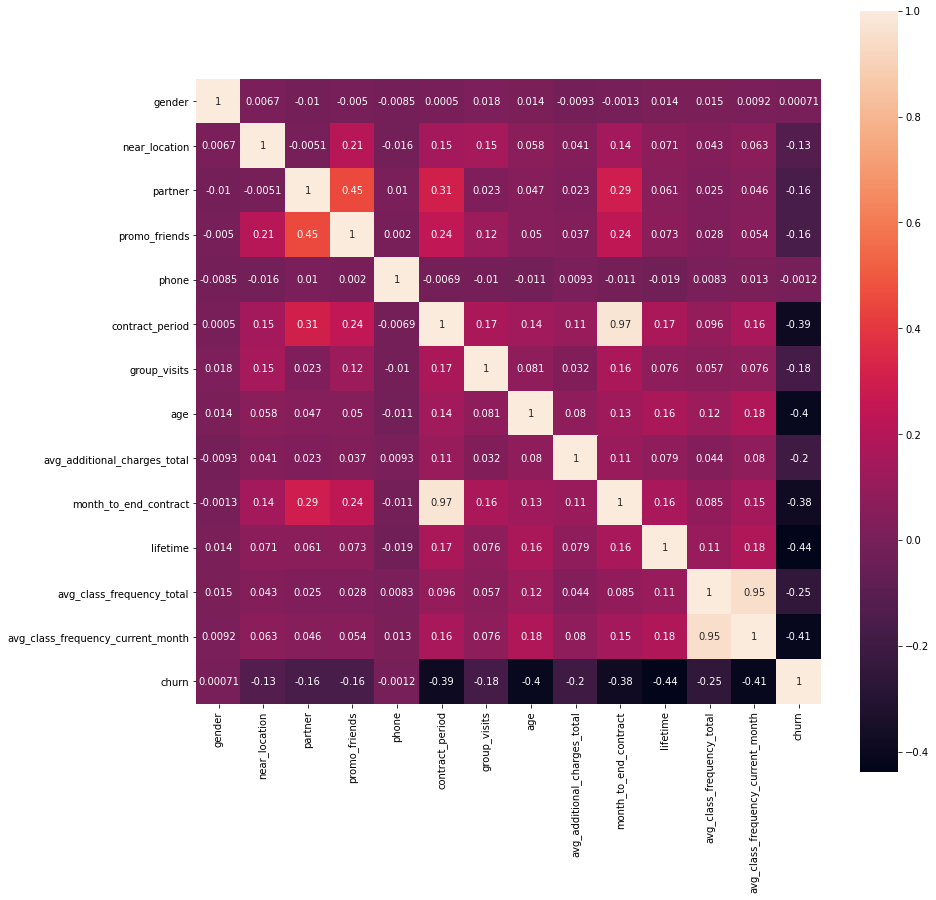

In [27]:
#building a correlation matrix for gym churn
corr_matrix = gym_churn.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show()

In the correlation matrix heatmap above, we can see that there are high correllations between the following:
* 'month_to_end_contract' and 'contract_period'
* 'avg_class_frequency_total' and 'avg_class_frequency_current_month'

However, we can't see any strong correllations for churn. We'll be able to get more information in the following models

# 4. Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.

* Divide the data into train and validation sets using the `train_test_split()` function.

* Train the model on the train set with two methods:

  - logistic regression
  - random forest

* Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

Remember to indicate the `random_state` parameter when dividing data and defining the algorithm.

In [28]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# define the model's algorithm
model = LogisticRegression(random_state=0)

# train the model
model.fit(X_train_st, y_train)

predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


In [29]:
'''
# divide the data into features (the X matrix) and a target variable (y)
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
'''
# define the model's algorithm
model = RandomForestClassifier(random_state=0)

# train the model
model.fit(X_train_st, y_train)

predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81


Based on the results form our models above, we can see that the LogisticRegression model was more accurate at prediction than the RandomForestClassifier model.

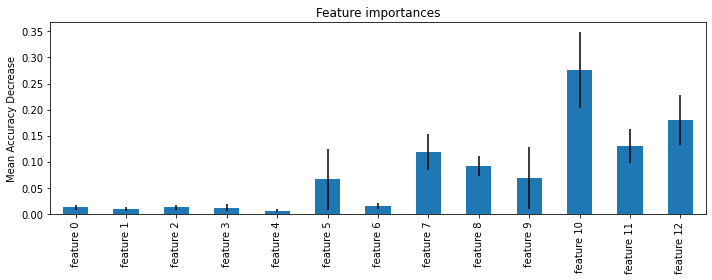

In [30]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_st, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(10, 4))
ax.set_title("Feature importances")
ax.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()

How long a person has been a member seems to be a important feature whether a member will churn or not. Most likely the longer they've been a memeber, the less likely they'll churn. 

In [39]:
model_LR = LogisticRegression(random_state=0)
model_LR.fit(X_train_st,y_train)

model_RFC = RandomForestClassifier(random_state=0,n_estimators=100)
model_RFC.fit(X_train_st,y_train)

RandomForestClassifier(random_state=0)

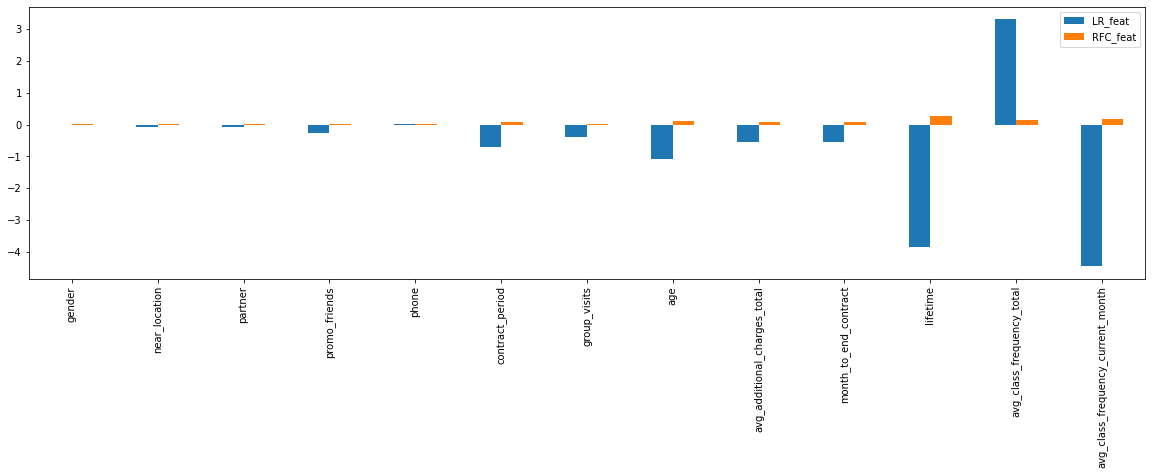

In [40]:
data = {'LR_feat':model_LR.coef_[0],'RFC_feat':model_RFC.feature_importances_}
features = pd.DataFrame(data=data,index=X.columns)
features.plot(kind='bar',figsize=(20,5))
plt.show()

In [31]:
'''
# divide the data into features (the X matrix) and a target variable (y)
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# write your code here

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler()# write your code here
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

# declare the list of models
models = [Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

# the function that calculates MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred# calculate the error vector
    y_error_abs = [abs(i) for i in y_error]# calculate the vector of errors' absolute values
    perc_error_abs = y_error_abs / y_true # calculate the relative error vector
    mape = perc_error_abs.sum() / len(y_true) #calculate MAPE
    return mape


# the function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred),
                                                                mean_squared_error(y_test, y_pred),
                                                                mape(y_test, y_pred),
                                                                r2_score(y_test, y_pred)))
#make_prediction(Lasso(), X_train, y_train, X_test, y_test)


# write a loop that outputs metrics for each model
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)
'''

"\n# divide the data into features (the X matrix) and a target variable (y)\nX = gym_churn.drop('churn', axis=1)\ny = gym_churn['churn']\n\n# divide the data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# write your code here\n\n# create a StandardScaler object and apply it to the train set\nscaler = StandardScaler()# write your code here\nX_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set\n\n# apply standardization to the feature matrix for the test set\nX_test_st = scaler.transform(X_test)\n\n# declare the list of models\nmodels = [Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]\n\n# the function that calculates MAPE\ndef mape(y_true, y_pred):\n    y_error = y_true - y_pred# calculate the error vector\n    y_error_abs = [abs(i) for i in y_error]# calculate the vector of errors' absolute values\n    perc_error_abs = y_error_abs / y

# 5. Create user clusters

Set aside the column with data on churn and identify object (user) clusters:

* Standardize the data.

* Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

* Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

* Look at the mean feature values for clusters. Does anything catch your eye?

* Plot distributions of features for the clusters. Do you notice anything?

* Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

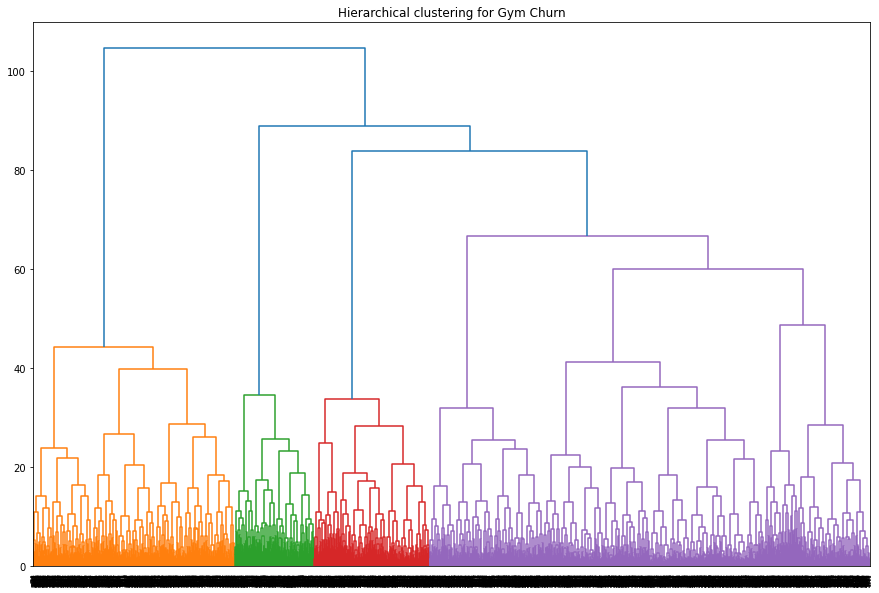

In [32]:
# creating a scaler class object (normalizer)
scaler = StandardScaler() 

# training the normalizer and transforming the dataset
x_sc = scaler.fit_transform(gym_churn.drop(columns = ['churn'])) 

linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Gym Churn')
plt.show() 

Based on the dendrogram above, it recommends that there are 4 clusters. But we will be creating 5 clusters this time.

In [33]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)

# predict the clusters for observations
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
gym_churn['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
mean_values = gym_churn.groupby(['cluster_km']).mean()

mean_values.transpose()

cluster_km,0,1,2,3,4
gender,0.496063,0.554524,0.501481,0.488221,0.523316
near_location,0.000000,0.979118,0.960513,1.000000,0.862694
partner,0.460630,0.356148,0.782823,0.350122,0.471503
promo_friends,0.078740,0.237819,0.573544,0.235581,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,2.375984,2.571926,10.892399,1.968318,4.777202
group_visits,0.218504,0.470998,0.541955,0.339561,0.427461
age,28.486220,30.090487,29.985192,28.142973,29.297927
avg_additional_charges_total,135.544499,161.973410,160.906685,130.490981,144.208179
month_to_end_contract,2.222441,2.372390,9.952616,1.877335,4.466321


In [34]:
churn = gym_churn.groupby(['cluster_km']).agg({'gender':'count', 'churn':'sum'})
churn = churn.rename(columns={
    'gender': 'number_of_members', 
    'churn': 'churn_count'})

churn['churn_rate_percentage']= churn['churn_count']/ churn['number_of_members']*100
churn

,number_of_members,churn_count,churn_rate_percentage
cluster_km,,,
0,508,224,44.094488
1,862,62,7.192575
2,1013,28,2.764067
3,1231,644,52.315191
4,386,103,26.683938


Based on the data above:

    - People in clusters 1, 2, and 3 are least likely to churn
    
    - People in clusters 0 and 4 the most likely to churn
    
    - Clusters 1, 2, and 3 all live near the gym, however, cluster 4 shows that just because somsone lives close to the gym, doesn't necessarily mean they will not churn. Still better off for someone to live close by.
    
    - Clusters 1, 2, and 3 seem to be using the promos, which means that helps
    
    - Clusters 2 and 3 have high contract periods which also helps
    
    - Clusters 1, 2, and 3 have high group visits
    
    - Clusters 1, 2, and 3 members on average are about 1 to 2 years older than clusters that churn
    
    - Clusters 1, 2, and 3 also have more additional charges. This probably means they are taking advantage of other gym services
    
    - Clusters 1, 2, and 3 have high month to end contracts
    
    - Clusters 1, 2, and 3 also have had longer memberships
    
    - Clusters 1, 2, and 3 have high attendance rates

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

"\nfor i in clust_1.columns:\n    sns.displot(data= clust_1, x= i, height= 4, aspect= 2)\n    plt.title('Cluster 1')\n    \nfor i in clust_2.columns:\n    sns.displot(data= clust_2, x= i, height= 4, aspect= 2)\n    plt.title('Cluster 2')\n    \nfor i in clust_3.columns:\n    sns.displot(data= clust_3, x= i, height= 4, aspect= 2)\n    plt.title('Cluster 3')\n    \nfor i in clust_4.columns:\n    sns.displot(data= clust_4, x= i, height= 4, aspect= 2)\n    plt.title('Cluster 4')\n    \nfor i in clust_5.columns:\n    sns.displot(data= clust_5, x= i, height= 4, aspect= 2)\n    plt.title('Cluster 5')\n"

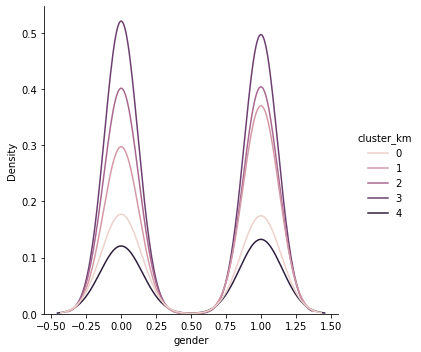

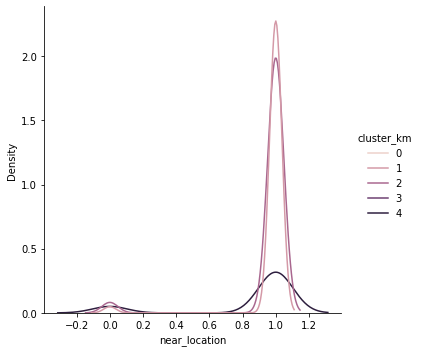

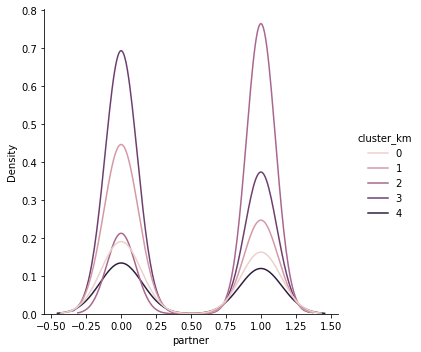

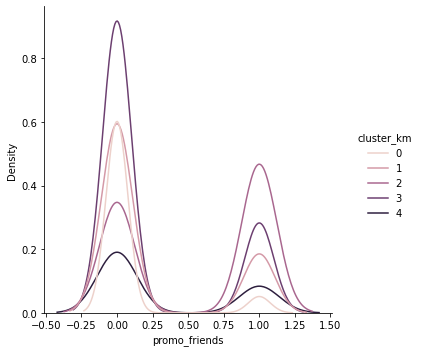

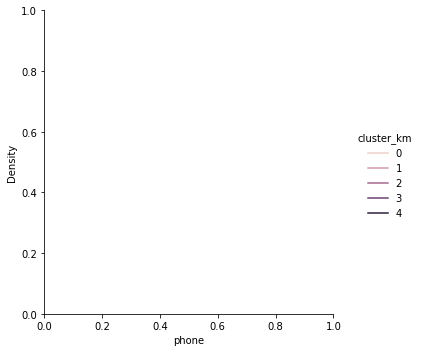

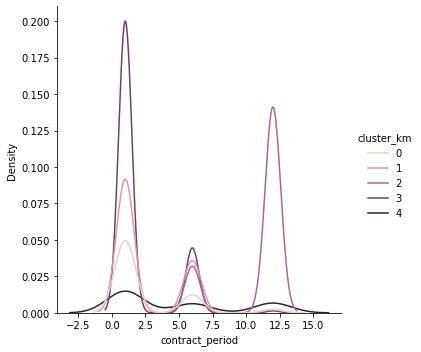

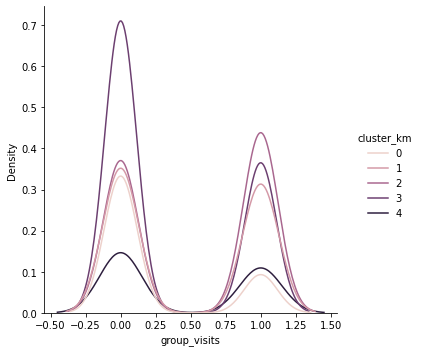

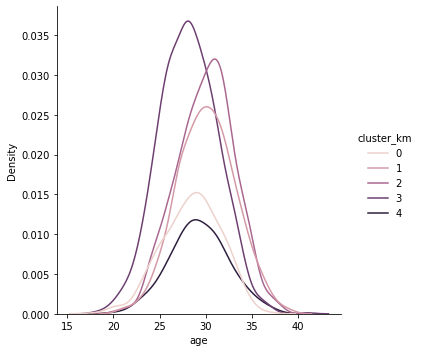

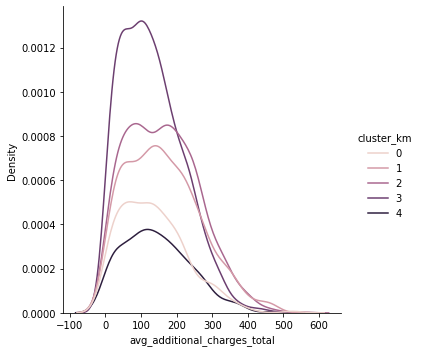

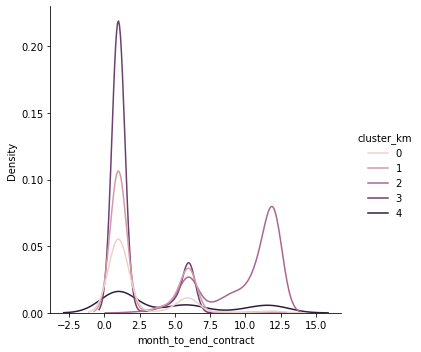

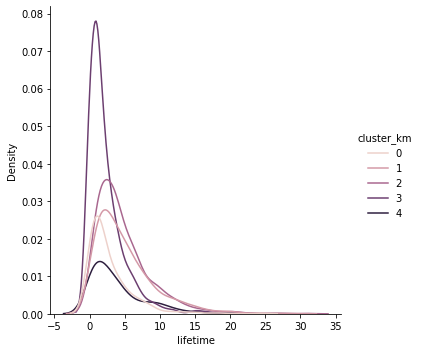

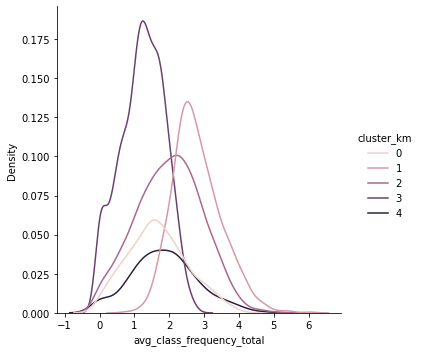

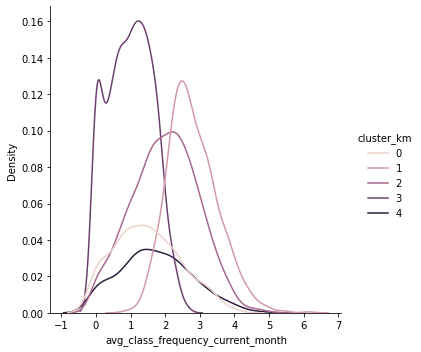

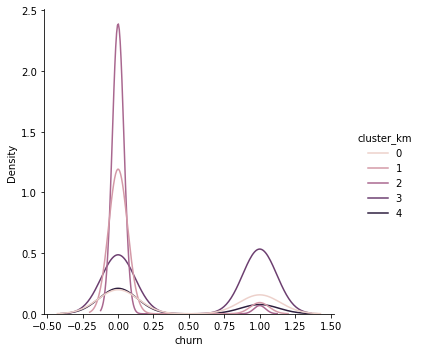

In [35]:
clust_0= gym_churn.query('cluster_km==0')
clust_1= gym_churn.query('cluster_km==1')
clust_2= gym_churn.query('cluster_km==2')
clust_3= gym_churn.query('cluster_km==3')
clust_4= gym_churn.query('cluster_km==4')

sns.displot(data= gym_churn, x= 'gender', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'near_location', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'partner', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'promo_friends', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'phone', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'contract_period', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'group_visits', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'age', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'avg_additional_charges_total', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'month_to_end_contract', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'lifetime', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'avg_class_frequency_total', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'avg_class_frequency_current_month', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= gym_churn, x= 'churn', hue= 'cluster_km',kind= 'kde', legend= True)

'''
for i in clust_1.columns:
    sns.displot(data= clust_1, x= i, height= 4, aspect= 2)
    plt.title('Cluster 1')
    
for i in clust_2.columns:
    sns.displot(data= clust_2, x= i, height= 4, aspect= 2)
    plt.title('Cluster 2')
    
for i in clust_3.columns:
    sns.displot(data= clust_3, x= i, height= 4, aspect= 2)
    plt.title('Cluster 3')
    
for i in clust_4.columns:
    sns.displot(data= clust_4, x= i, height= 4, aspect= 2)
    plt.title('Cluster 4')
    
for i in clust_5.columns:
    sns.displot(data= clust_5, x= i, height= 4, aspect= 2)
    plt.title('Cluster 5')
'''

In [36]:
'''
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

show_clusters_on_plot(gym_churn, 'gender', 'near_location', 'cluster_km')
'''

"\ndef show_clusters_on_plot(df, x_name,y_name, cluster_name):\n    plt.figure(figsize = (10,10))\n    sns.scatterplot(df[x_name], df[y_name],\n          hue = df[cluster_name], palette = 'Paired'\n       )\n    plt.title('{} vs {}'.format(x_name, y_name))\n    plt.show()\n\nshow_clusters_on_plot(gym_churn, 'gender', 'near_location', 'cluster_km')\n"

# 6. Come up with conclusions and basic recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.

You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

# Conclusions:

- It's even among churners between Men and Women
    
- People who live closer to the gym are less likely to churn
    
- People who go to the gym with a partner are less likely to churn
    
- People who go to the gym because of a promo are less likely to churn
    
- There is no difference whether a person provides their phone number or not
    
- People who have a longer contract period are less likely to churn
    
- People who attend group workouts are less likely to churn
    
- People who are older (30 year old avg) are less likely to churn
    
- People who pay a little more are less likely to churn
    
- People with longer month to end contract are less likely to churn
    
- People who have been members for longer are less likely to churn
    
- People who attend more classes are less likley to churn

- People in clusters 1, 2, and 3 are least likely to churn
    
- People in clusters 0 and 4 the most likely to churn
    
- Clusters 1, 2, and 3 all live near the gym, however, cluster 4 shows that just because somsone lives close to the gym, doesn't necessarily mean they will not churn. Still better off for someone to live close by.
    
- Clusters 1, 2, and 3 seem to be using the promos, which means that helps
    
- Clusters 2 and 3 have high contract periods which also helps
    
- Clusters 1, 2, and 3 have high group visits
    
- Clusters 1, 2, and 3 members on average are about 1 to 2 years older than clusters that churn
    
- Clusters 1, 2, and 3 also have more additional charges. This probably means they are taking advantage of other gym services
    
- Clusters 1, 2, and 3 have high month to end contracts
    
- Clusters 1, 2, and 3 also have had longer memberships
    
- Clusters 1, 2, and 3 have high attendance rates

<b>Members have a lower probability of churning if they:</b>

- Live closer to the gym
    
- Go to the gym with a partner
    
- Go to the gym because of a promo
    
- Have a longer contract period
    
- Attend group workouts
    
- Are older (30 year old avg)
    
- Pay a little more/ Additional Charges
    
- Have been members for longer
    
- Attend more group classes

- Have high attendance rates

# Recommendations:

<b> Things to focus on in order to retain gym members:</b>

* Members who live close by
* "Bring a friend" promo codes
* Sell members longer contract periods
* Group classes
* Older members
* Additional gym services: cafe, athletic goods, cosmetics, massages, etc.